In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/country.csv')

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
import matplotlib.pyplot as plt

In [11]:
df=df.drop('country',axis=1)

In [12]:
df.shape

(167, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [16]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<Axes: >

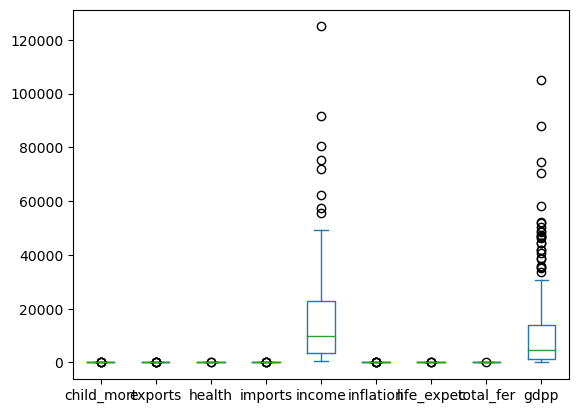

In [17]:
df.plot(kind='box')

In [19]:
q1,q3=df['income'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [20]:
indices=df[(df['income']<lower_bound) | (df['income']>upper_bound)].index

In [21]:
df=df.drop(indices,axis=0)

In [22]:
df.shape

(159, 9)

In [23]:
q1,q3=df['gdpp'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [24]:
indices=df[(df['gdpp']<lower_bound) | (df['gdpp']>upper_bound)].index

In [25]:
df=df.drop(indices,axis=0)

In [26]:
df.shape

(139, 9)

In [28]:
df=df.drop_duplicates()

In [29]:
df.shape

(139, 9)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.decomposition import PCA

In [32]:
from sklearn.cluster import KMeans

In [33]:
import seaborn as sns

In [60]:
df.head()
df.shape
df1=df

In [62]:
x=df1
df1.shape

(139, 9)

In [63]:
x=StandardScaler().fit_transform(x)

In [64]:
pca=PCA(n_components=2)

In [65]:
principalcomponents=pca.fit_transform(x)

In [66]:
principaldf=pd.DataFrame(data=principalcomponents,columns=['pc1','pc2'])
principaldf.shape
df1.shape

(139, 9)

In [67]:
final_df=pd.concat([df1,principaldf],axis=1)
final_df.shape

(161, 11)

In [52]:
final_df.iloc[150]

child_mort         NaN
exports            NaN
health             NaN
imports            NaN
income             NaN
inflation          NaN
life_expec         NaN
total_fer          NaN
gdpp               NaN
pc1           2.319431
pc2          -1.003325
Name: 73, dtype: float64

In [92]:
kmeans=KMeans(n_clusters=2)
final_df.shape
df.shape

(139, 10)

In [93]:
df['cluster']=kmeans.fit_predict(principalcomponents)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [94]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [95]:
df.shape
df_final=pd.concat([df,principaldf],axis=1).dropna()
df_final.shape
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,pc1,pc2
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,-2.891142,0.489926
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,0.893912,-0.291932
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,0.406457,-1.380933
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,-2.324917,0.066872
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,2.126164,0.081076


In [96]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

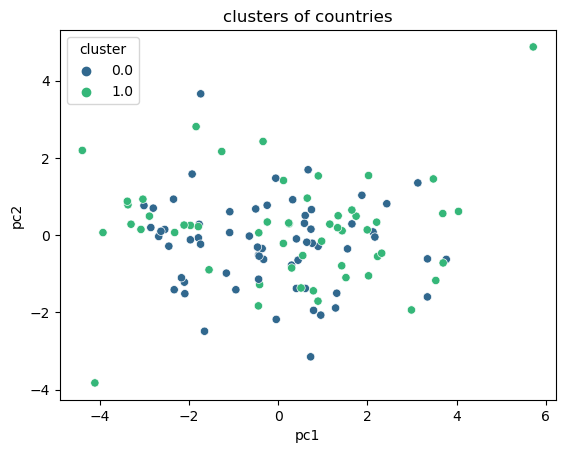

In [97]:
sns.scatterplot(x='pc1',y='pc2',hue='cluster',data=df_final,palette='viridis')
plt.title('clusters of countries')
plt.show()